# Learning goals

Understand the following:

- Probability distribution
- Probability density function (PDF)
- Gaussian distribution
- Histogram
- Mean
- Standard deviation
- Variance
- Mode

We will discuss these as we work through this example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [46]:
sample_size = 30

true_mean = 10.0
true_variance = 4.0
true_std = np.sqrt(true_variance)

rng = np.random.RandomState(123)
fish_sample = rng.normal(loc=true_mean, scale=true_std, size=sample_size)

In [35]:
fish_sample

array([ 7.82873879, 11.99469089, 10.565957  ,  6.98741057,  8.8427995 ,
       13.30287307,  5.14664151,  9.14217474, 12.53187252,  8.2665192 ,
        8.6422277 ,  9.81058206, 12.98277925,  8.72219601,  9.11203608,
        9.13129745, 14.41186017, 14.37357218, 12.0081078 , 10.7723728 ,
       11.47473715, 12.98146406,  8.12833226, 12.35165809,  7.49223866,
        8.724497  , 11.81421039,  7.1426386 ,  9.71986256,  8.27649021])

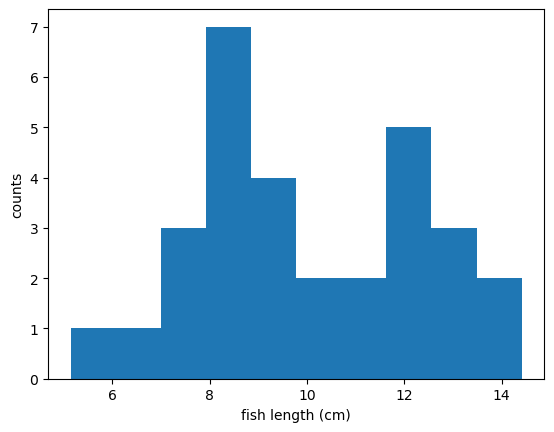

In [36]:
x=plt.hist(fish_sample)
plt.xlabel("fish length (cm)")
plt.ylabel("counts");

In [37]:
x

(array([1., 1., 3., 7., 4., 2., 2., 5., 3., 2.]),
 array([ 5.14664151,  6.07316338,  6.99968524,  7.92620711,  8.85272897,
         9.77925084, 10.7057727 , 11.63229457, 12.55881644, 13.4853383 ,
        14.41186017]),
 <BarContainer object of 10 artists>)

## What is the mean of the sample of fish lengths?

In [38]:
sample_mean = np.mean(fish_sample)
print(sample_mean)

10.089427941923741


## What is the [mode](https://en.wikipedia.org/wiki/Mode_(statistics)) of the sample of fish lengths? ("[modus](https://de.wikipedia.org/wiki/Modus_(Statistik))" in German.)

## What is the sample variance of fish lengths?

We put the result in the variable `length_variance`. We use the `ddof=1` keyword argument to `np.var()` because we are estimating variance from a sample here.

In [39]:
sample_variance = np.var(fish_sample, ddof=1)
print(sample_variance)

5.637780974408913


# Probability Density Functions (PDFs)

- for working with continuous variables (vs. probability mass functions for discrete variables)
- here, the area under the curve gives the probability (in contrast to probability mass functions where we have probabilities for every single value)
- the area under the whole curve is 1. In other words, some outcome must happen.

## Normal Distribution (Gaussian Distribution)

- unimodal and symmetric
- many algorithms in machine learning & statistics have normality assumptions
- two parameters: mean (center of the peak) and standard deviation (spread); $N(\mu, \sigma)$
- we can estimate parameters $\mu$ and $\sigma$ by the sample mean ($\bar{x})$ and sample variance ($s^2$)
- univariate Normal distribution:

$$N(\mu, \sigma) = f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$

- standard normal distribution with zero mean and unit variance, $N(0, 1)$:

In [40]:
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / (2.*variance))))

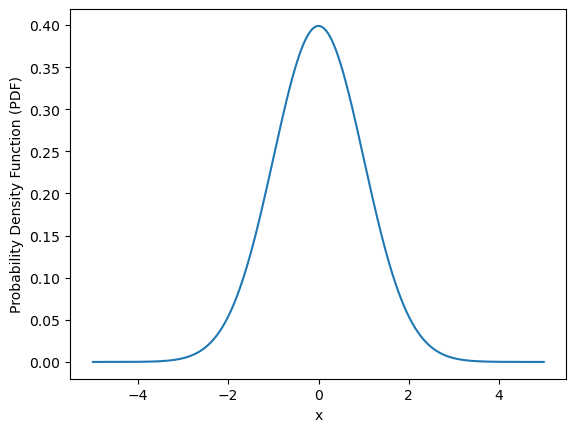

In [41]:
mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

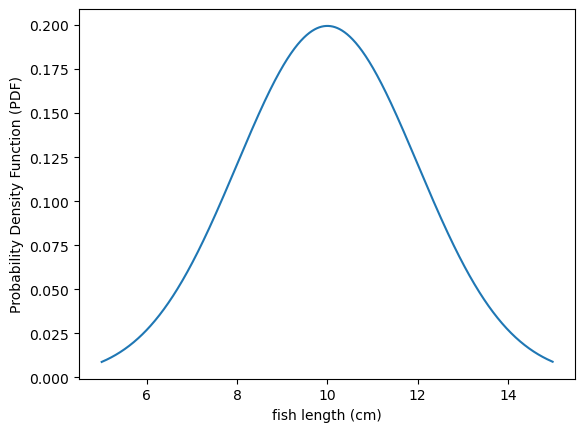

In [42]:
mean = 10
stddev = 2.0
x = np.arange(5, 15, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('fish length (cm)')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

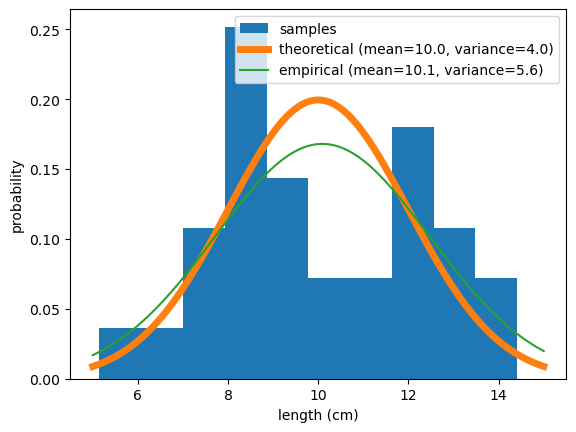

In [47]:
plt.hist(fish_sample, density=True, label='samples')

x = np.linspace(5.0, 15.0, 100)
y = univariate_gaussian_pdf(x, true_mean, true_variance)
plt.plot(x, y, lw=5, label='theoretical (mean=%.1f, variance=%.1f)'%(true_mean,true_variance))

sample_mean = np.mean(fish_sample)
sample_variance = np.var(fish_sample, ddof=1) # for a sample variance, always use ddof=1. Here is one explanation why https://mortada.net/computing-sample-variance-why-divide-by-n-1.html
y2 = univariate_gaussian_pdf(x, sample_mean, sample_variance)
plt.plot(x, y2, label='empirical (mean=%.1f, variance=%.1f)'%(sample_mean,sample_variance))

plt.xlabel("length (cm)")
plt.ylabel("probability");
plt.legend();
# plt.savefig('fish-gaussian.png');

## Discussion points

Here are a few questions you should be able to answer:

 - what is plotted on the x axis?
 - what is plotted on the y axis?
 - what is the area under the curve from -∞ to ∞?
 - according to our Guassian distribution, what is the most likely fish length?
 - according to our histogram, what is the most likely fish length?